In [1]:
import utils
import motifs

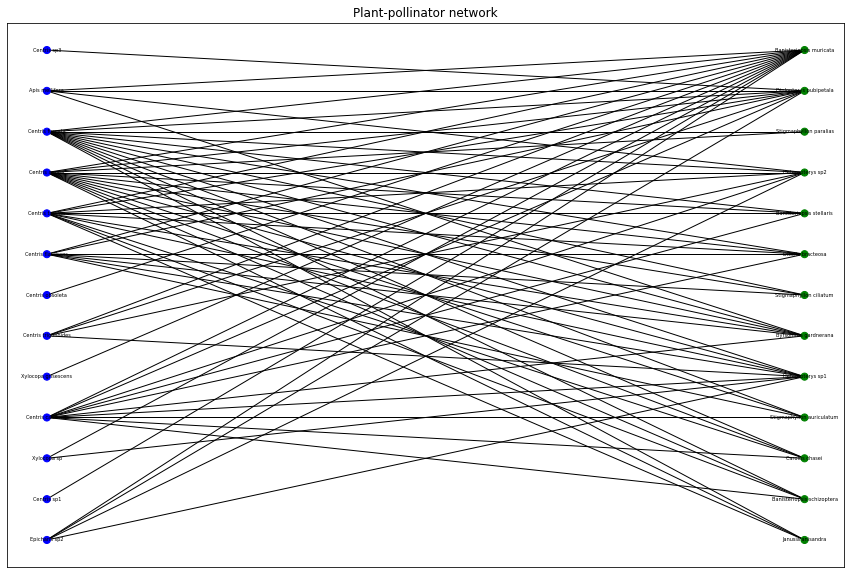

In [2]:
DATA_FOLDER = '../dataset/'
DATASET = 'bezerra-et-al-2009_MOD.xls'
path = DATA_FOLDER + DATASET

# plot a bipartite graph
G, pol, pla = utils.build_graph_from_xls(path, verbose=False)
utils.plot_bipartite_graph(G, pol)

In [3]:
dc = utils.degree_centrality(G)
cc, bc = utils.compute_centralities(G)

centralities = [dc, cc, bc]
centralities_names = ['degree centrality', 'closeness centrality', 'betweenness centrality']

df = utils.top_K_nodes_df(G, centralities, centralities_names, K=5, all_nodes=True, show_value=True, only_pollinators=True)
df

,degree centrality,closeness centrality,betweenness centrality
1,"(Centris aenea, 13)","(Centris aenea, 0.6756756756756757)","(Centris aenea, 0.17218785352578458)"
2,"(Centris fuscata, 13)","(Centris fuscata, 0.6756756756756757)","(Centris fuscata, 0.17218785352578458)"
3,"(Centris caxiensis, 10)","(Centris caxiensis, 0.5813953488372093)","(Centris tarsata, 0.08749381496408291)"
4,"(Centris tarsata, 10)","(Centris tarsata, 0.5813953488372093)","(Centris caxiensis, 0.0835180869354244)"
5,"(Centris flavifrons, 7)","(Centris flavifrons, 0.5102040816326531)","(Centris flavifrons, 0.047528905906614884)"
6,"(Epicharis sp2, 4)","(Epicharis sp2, 0.45454545454545453)","(Apis mellifera, 0.012397569750510927)"
7,"(Centris trigonoides, 4)","(Centris trigonoides, 0.45454545454545453)","(Epicharis sp2, 0.011445521798462975)"
8,"(Apis mellifera, 4)","(Apis mellifera, 0.45454545454545453)","(Centris trigonoides, 0.011445521798462975)"
9,"(Xylocopa sp, 2)","(Xylocopa sp, 0.4098360655737705)","(Xylocopa sp, 0.0017948717948717949)"
10,"(Centris sp1, 1)","(Centris sp1, 0.3968253968253968)","(Centris sp1, 0.0)"
